# The best neighborhood to buy ingredients in

### If you want to eat cheap and healthy, cooking your own food is paramount. Getting takeout or eating out every day gets pricy, as I'm sure we all know.

### Here, we'll objectively rank neighborhoods by how plentiful ingredients are. 

### There are two types of places to buy ingredients: grocery stores and convenience stores.

### Procedure: we have (1) a CSV from the city with each store's category (grocery or convenience), latitude, and longitude. We convert it to a Pandas Dataframe, for ease of use. Also, we have some awesome code snippets from our lovely TA Griffin to neatly translate each store's coordinates to its neighborhood. We append another column to the Dataframe with each store's neighborhood here:

In [2]:
import geopandas
import pandas as pd
from shapely.geometry import Point

# Load neighborhoods
NEIGHBORHOODS = geopandas.read_file("https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/c5a93a8e-03d7-4eb3-91a8-c6b7db0fa261/download/pittsburghpaneighborhoods-.zip")
# Load zip codes
ZIPS = geopandas.read_file("https://data.wprdc.org/dataset/1a5135de-cabe-4e23-b5e4-b2b8dd733817/resource/ec228c0e-6b1e-4f44-a335-df05546d52ea/download/alcogisallegheny-county-zip-code-boundaries.zip")

def geo_to_neighborhood(latitude, longitude):
    """Converts a geolocation (latitude and longitude) to a Pittsburgh neighborhood name.

    Args:
        latitude (float): The latitude of the point.
        longitude (float): The longitude of the point.

    Returns:
        Union[str, None]: Name of the Pittsburgh neighborhood the point falls within or None if it does not fall within a neighborhood.
    """
    # Create a shapely point for the latitude and longitude
    pt = Point(longitude, latitude)
    # Loop through the neighborhoods
    for _idx, neighborhood in NEIGHBORHOODS.iterrows():
        # Check if this neighborhood contains the point
        if neighborhood["geometry"].contains(pt):
            # Return the name of the neighborhood
            return neighborhood["hood"]
    # Wasn't contained in the neighborhood
    return None

def zip_to_neighborhoods(zip_code):
    """Converts a ZIP code to a list of Pittsburgh neighborhood names.

    Args:
        zip_code (int): The ZIP code of interest.

    Returns:
        list[str]: A list of neighborhood names within that ZIP code.
    """
    # Get this specific zip
    zips_filtered = ZIPS[ZIPS["ZIP"] == str(zip_code)]
    if len(zips_filtered) < 1:
        return None
    zp = zips_filtered.iloc[0]
    # List of neighborhoods for this zip
    zp_neighborhoods = []
    # Loop through the neighborhoods
    for _idx, neighborhood in NEIGHBORHOODS.iterrows():
        # Check if this zip intersects the neighborhood
        if neighborhood["geometry"].intersects(zp["geometry"]):
            # Add this neighborhood to the list
            zp_neighborhoods.append(neighborhood["hood"])
    return zp_neighborhoods

In [3]:
raw = pd.read_csv('data-conveniencesupermarkets.csv')

neighborhood = []

for index, row in raw.iterrows():
    lat = float(row["Lat"])
    lon = float(row["Lon"])
    output = geo_to_neighborhood(lat, lon)
    neighborhood.append(output)
    
raw['Neighborhood'] = neighborhood

### Now we have successfully added a column in our dataframe for each supermarket's neighborhood. Now, we visualize each neighborhood's supermarkets and convenience stores.

### We make two dictionaries, one with neighborhoods vs. grocery stores, and the other with neighborhoods vs. convenience stores, printed for your consideration:

In [4]:
neighborhoods = []
for index, row in raw.iterrows():
    if row["Neighborhood"] not in neighborhoods:
        neighborhoods.append(row["Neighborhood"])
neighborhoods.pop(0)

hood_groceries = {x:0 for x in neighborhoods}

for key in hood_groceries:
    for index, row in raw.iterrows():
        if row["Category"] == "Supermarket" and row["Neighborhood"] == key:
            hood_groceries[key] += 1
print("Neighborhood groceries:")
print(hood_groceries)
print("\n")

hood_bodegas = {x:0 for x in neighborhoods}

for key in hood_bodegas:
    for index, row in raw.iterrows():
        if row["Category"] == "Convenience Store" and row["Neighborhood"] == key:
            hood_bodegas[key] += 1
print("Neighborhood convenience stores:")
print(hood_bodegas)

Neighborhood groceries:
{'Lincoln Place': 0, 'Central Business District': 0, 'South Shore': 0, 'Homewood South': 0, 'Greenfield': 1, 'Northview Heights': 0, 'Shadyside': 3, 'East Hills': 0, 'Terrace Village': 0, 'Squirrel Hill South': 2, 'Spring Garden': 1, 'Strip District': 4, 'South Side Flats': 2, 'Garfield': 0, 'Troy Hill': 0, 'Brookline': 1, 'Central Oakland': 1, 'Upper Lawrenceville': 1, 'North Oakland': 1, 'Chateau': 0, 'Crawford-Roberts': 1, 'Central Northside': 0, 'Polish Hill': 0, 'Morningside': 0, 'Middle Hill': 0, 'Bloomfield': 3, 'Carrick': 5, 'Summer Hill': 0, 'Banksville': 1, 'Highland Park': 0, 'Perry North': 0, 'Central Lawrenceville': 0, 'Arlington': 0, 'Marshall-Shadeland': 1, 'Lower Lawrenceville': 0, 'Mount Washington': 1, 'South Oakland': 0, 'Allentown': 0, 'East Allegheny': 1, 'Westwood': 1, 'Bluff': 0, 'Homewood West': 0, 'Point Breeze': 0, 'East Liberty': 2, 'Larimer': 0, 'Homewood North': 0, 'Sheraden': 0, 'Upper Hill': 0, 'Beltzhoover': 0, 'Friendship': 1, 'E

### Now, let's visualize each neighborhood's grocery stores, with the trusty Matplotlib library:

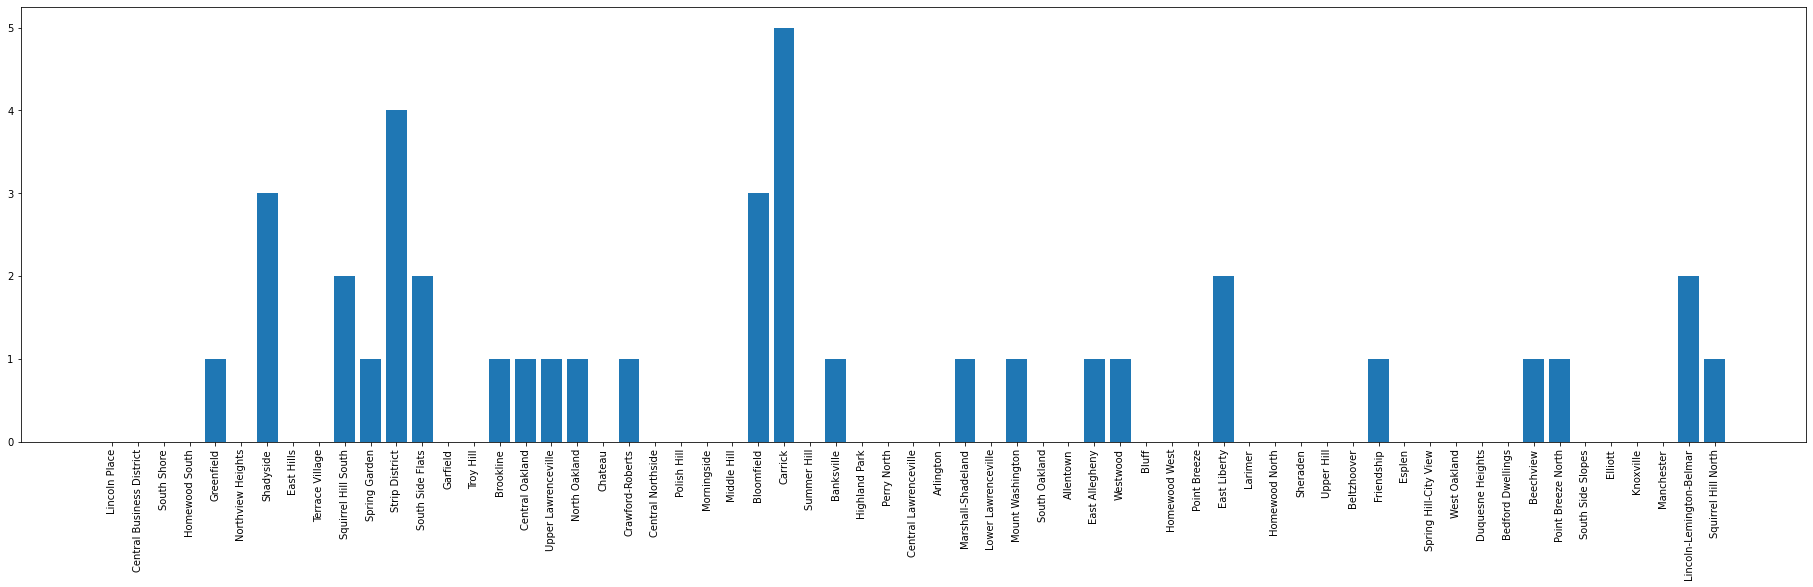

In [19]:
import matplotlib.pyplot as pl

hoods = list(hood_groceries.keys())
groceries = list(hood_groceries.values())

pl.figure(figsize=(32, 8))
pl.bar(range(len(hoods)), groceries, tick_label=hoods)
pl.xticks(rotation=90)
pl.show()

### If you zoom in, we can see that Carrick has the most grocery stores, at 5, the Strip District has the second most, at 4, and Shadyside and Bloomfield tie for the third most, with 3 apiece.

### Let's do the same with convenience stores.

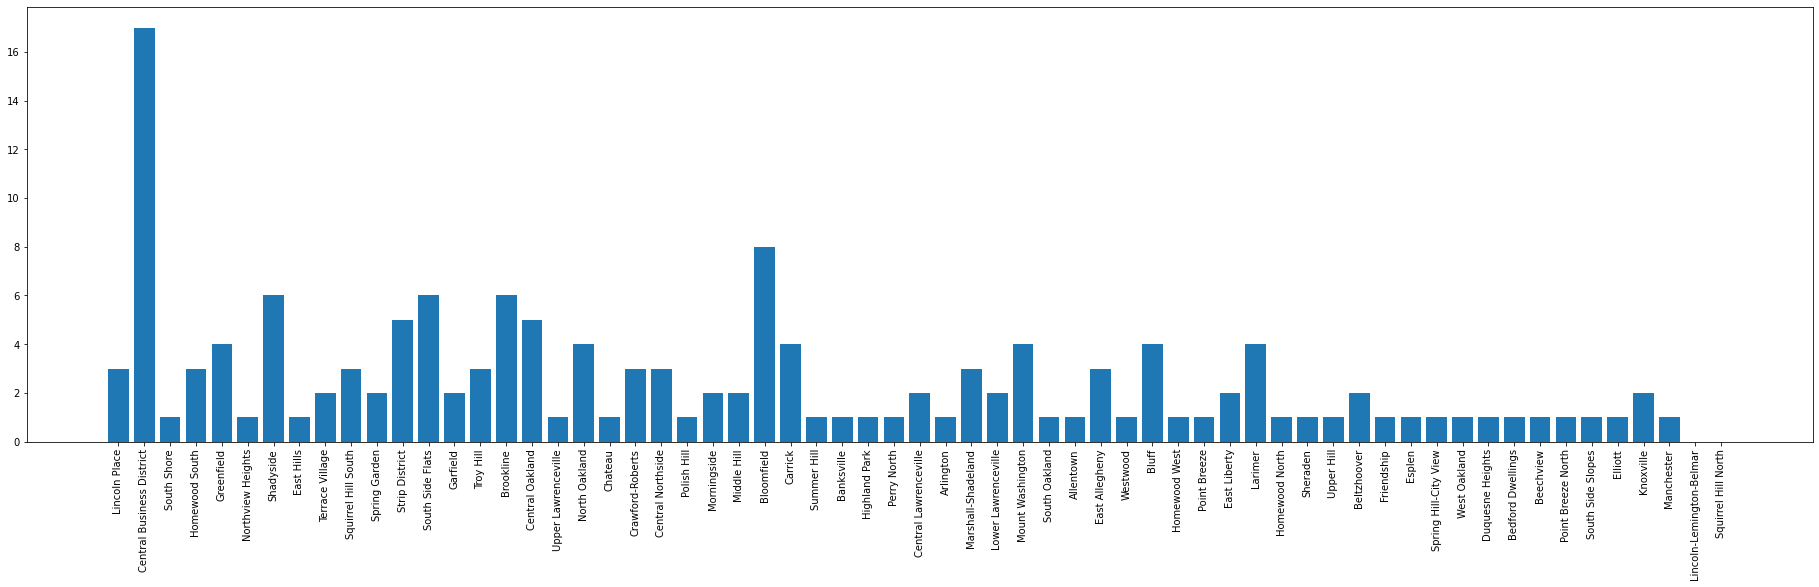

In [20]:
import matplotlib.pyplot as plt

hoods_b = list(hood_bodegas.keys())
bodegas = list(hood_bodegas.values())

pl.figure(figsize=(32, 8))
plt.bar(range(len(hoods_b)), bodegas, tick_label=hoods_b)
plt.xticks(rotation=90)
plt.show()

### If you zoom in, we can see that the Central Business District (Downtown) has by far the most convenience stores, at 17, Bloomfield has the second most, at 8, and Shadyside, the South Side Flats, and Brookline tie for third most, at 6 apiece.

### Combining the scores of grocery stores and convience stores, we proffer Bloomfield as being the best neighborhood to buy ingredients in-- it has a good balance of grocery stores (for the weekly haul) and convenience stores (for weeknight runs to grab little things) that other neighborhoods lack.